In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# /name, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Multiverient  verient stock  price prediction


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df=pd.read_csv("/kaggle/input/googledta/trainset.csv",parse_dates=True,index_col='Date')
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000


**Select the multiple data for multiverient stock price pridiction**

In [56]:
data_training=pd.DataFrame(df[['Open','High','Low','Close']][0:int(len(df)*0.50)])
data_validating=pd.DataFrame(df[['Open','High','Low','Close']][int(len(df)*0.50):int(len(df)*0.70)])
data_testing =pd.DataFrame(df[['Open','High','Low','Close']][int(len(df)*0.70):int(len(df))])

Data Spliting 

In [57]:
print(data_training.shape)
print(data_validating.shape)
print(data_testing.shape)

(629, 4)
(252, 4)
(378, 4)


**i am taking four column like open, High, low , Close**

In [58]:
data_training

,Open,High,Low,Close
Date,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177
2013-01-03,360.122742,363.600128,358.031342,359.496826
2013-01-04,362.313507,368.339294,361.488861,366.600616
2013-01-07,365.348755,367.301056,362.929504,365.001007
2013-01-08,365.393463,365.771027,359.874359,364.280701
...,...,...,...,...
2015-06-25,538.869995,540.900024,535.229980,535.229980
2015-06-26,537.260010,537.760010,531.349976,531.690002
2015-06-29,525.010010,528.609985,520.539978,521.520020


**Normalization**

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_validating_array=scaler.fit_transform(data_validating)
data_testing_array=scaler.fit_transform(data_testing)

Spliting the data into x_train,y_train

In [60]:
x_train=[]
y_train=[]
length=60
for i in range(length,data_training_array.shape[0]):
    x_train.append(data_training_array[i-length:i])
    y_train.append(data_training_array[i])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [61]:
x_train.shape,y_train.shape

((569, 60, 4), (569, 4))

**Spliting data into x_validation,y_validation**

In [62]:
x_val=[]
y_val=[]

for i in range(length,data_validating_array.shape[0]):
    x_val.append(data_validating_array[i-length:i])
    y_val.append(data_validating_array[i])
    
x_val,y_val=np.array(x_val),np.array(y_val)

In [63]:
x_val.shape,y_val.shape

((192, 60, 4), (192, 4))

**Spliting the data into x_test,y_test**

In [64]:
x_test=[]
y_test=[]

for i in range(length,data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-length:i])
    y_test.append(data_testing_array[i])
    
x_test,y_test=np.array(x_test),np.array(y_test)

In [65]:
#shape of data
x_test.shape,y_test.shape

((318, 60, 4), (318, 4))

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((length, 4)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(4, 'linear'))


from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
import tensorflow as tf


n_features=4
model4=tf.keras.models.Sequential()

#first LSTM Layer
model4.add(tf.keras.layers.LSTM(units=60, activation='relu',return_sequences= True, input_shape=(length,n_features)))
# dropout layer
model4.add(tf.keras.layers.Dropout(0.2))

#second LSTM Layer
model4.add(tf.keras.layers.LSTM(units=60, activation='relu',return_sequences= True,))
# dropout layer
model4.add(tf.keras.layers.Dropout(0.2))

#third LSTM Layer
model4.add(tf.keras.layers.LSTM(units=80, activation='tanh',return_sequences= True,))
# dropout layer
model4.add(tf.keras.layers.Dropout(0.2))

#fourth  LSTM Layer
model4.add(tf.keras.layers.LSTM(units=120, activation='tanh'))
# dropout layer
model4.add(tf.keras.layers.Dropout(0.2))
# output layer

model4.add(tf.keras.layers.Dense(units=4))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 60, 60)            15600     
                                                                 
 dropout_32 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_33 (LSTM)              (None, 60, 60)            29040     
                                                                 
 dropout_33 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_34 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_34 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_35 (LSTM)              (None, 120)              

In [74]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [75]:
model4.fit(x_train,y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[cp1])

Epoch 1/50
18/18 [==============================] - 22s 935ms/step - loss: 0.1674 - root_mean_squared_error: 0.4092 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 2/50
18/18 [==============================] - 15s 848ms/step - loss: 0.0226 - root_mean_squared_error: 0.1503 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1163
Epoch 3/50
18/18 [==============================] - 4s 226ms/step - loss: 0.0163 - root_mean_squared_error: 0.1275 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174
Epoch 4/50
18/18 [==============================] - 4s 225ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 5/50
18/18 [==============================] - 4s 227ms/step - loss: 0.0114 - root_mean_squared_error: 0.1068 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1266
Epoch 6/50
18/18 [==============================] - 5s 272ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0160 - va

In [78]:
# ** Checking Prediction with train data **


train_predictions = model4.predict(x_train)
train_results = pd.DataFrame(data={'Train Predictions_1':train_predictions[:,0],'Train Predictions_2':train_predictions[:,1] ,'Train Predictions_3':train_predictions[:,2],'Train Predictions_4':train_predictions[:,3],'Actuals_1':y_train[:,0],'Actuals_2':y_train[:,1],'Actuals_3':y_train[:,2],'Actuals_4':y_train[:,3]})
train_results

18/18 [==============================] - 0s 22ms/step


,Train Predictions_1,Train Predictions_2,Train Predictions_3,Train Predictions_4,Actuals_1,Actuals_2,Actuals_3,Actuals_4
0,0.166171,0.180024,0.167551,0.177868,0.173038,0.185105,0.186836,0.190064
1,0.165026,0.178987,0.166618,0.176811,0.191290,0.209134,0.207387,0.212971
2,0.164045,0.178104,0.165862,0.175921,0.208373,0.207931,0.201021,0.199749
3,0.163238,0.177377,0.165301,0.175197,0.190734,0.191790,0.183108,0.178233
4,0.162518,0.176729,0.164831,0.174561,0.155897,0.155958,0.154623,0.154997
...,...,...,...,...,...,...,...,...
564,0.626697,0.637790,0.618497,0.643207,0.727946,0.732506,0.730103,0.724052
565,0.629084,0.640157,0.620928,0.645579,0.721739,0.720433,0.715171,0.710277
566,0.631486,0.642493,0.623327,0.647982,0.674511,0.685251,0.673570,0.670702
567,0.632922,0.643825,0.624704,0.649441,0.678405,0.676177,0.673417,0.666771


<Axes: >

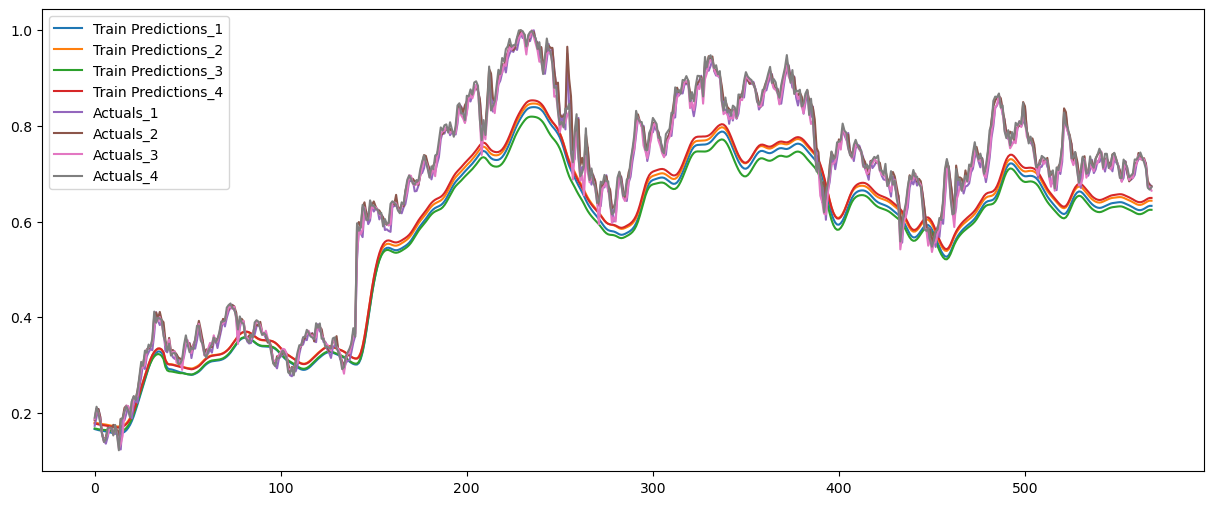

In [79]:
train_results.plot(figsize=(15,6))

In [80]:
train_predictions = model4.predict(x_train)
train_results_0 = pd.DataFrame(data={'Train Predictions_0':train_predictions[:,0], 'Actuals_0':y_train[:,0]})
train_results_0

18/18 [==============================] - 1s 27ms/step


,Train Predictions_0,Actuals_0
0,0.166171,0.173038
1,0.165026,0.191290
2,0.164045,0.208373
3,0.163238,0.190734
4,0.162518,0.155897
...,...,...
564,0.626697,0.727946
565,0.629084,0.721739
566,0.631486,0.674511
567,0.632922,0.678405


<Axes: >

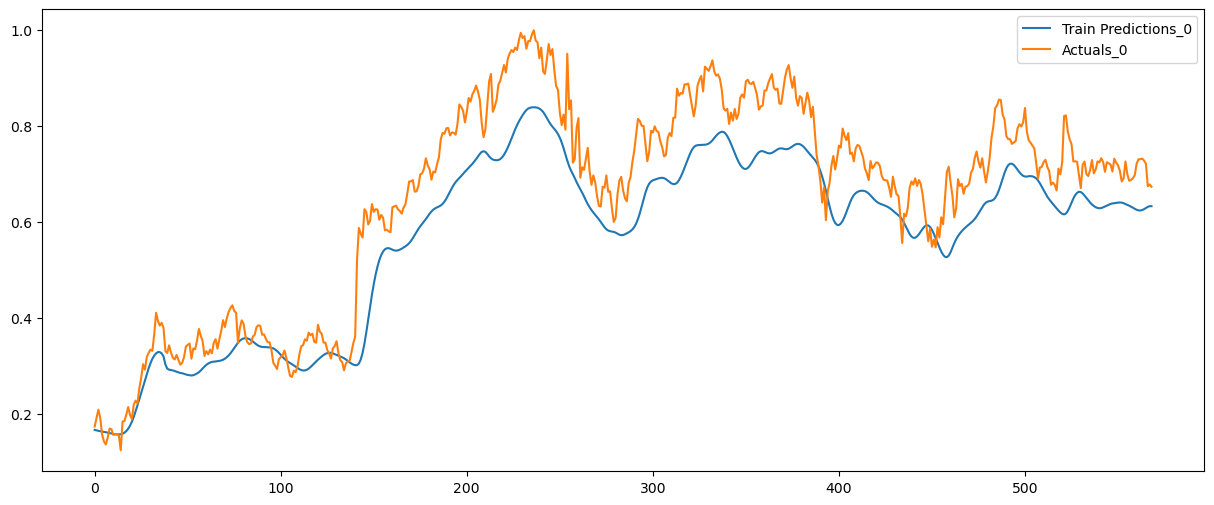

In [81]:
train_results_0.plot(figsize=(15,6))

In [82]:
train_predictions = model4.predict(x_train)
train_results_1 = pd.DataFrame(data={'Train Predictions_1':train_predictions[:,1], 'Actuals_1':y_train[:,1]})
train_results_1

18/18 [==============================] - 1s 29ms/step


,Train Predictions_1,Actuals_1
0,0.180024,0.185105
1,0.178987,0.209134
2,0.178104,0.207931
3,0.177377,0.191790
4,0.176729,0.155958
...,...,...
564,0.637790,0.732506
565,0.640157,0.720433
566,0.642493,0.685251
567,0.643825,0.676177


<Axes: >

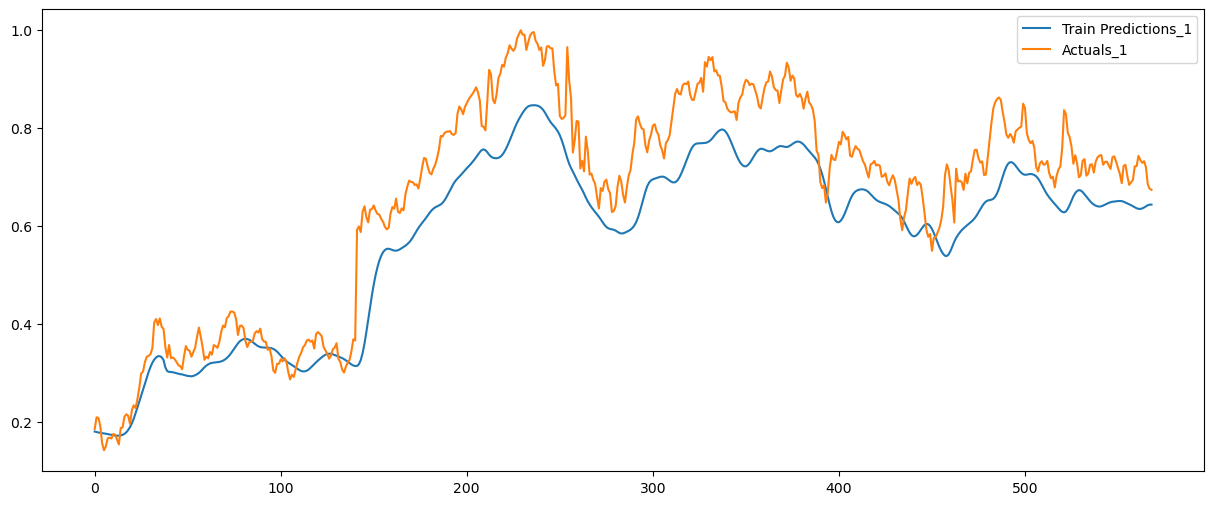

In [83]:
train_results_1.plot(figsize=(15,6))

In [84]:
train_predictions = model4.predict(x_train)
train_results_2 = pd.DataFrame(data={'Train Predictions_2':train_predictions[:,2], 'Actuals_2':y_train[:,2]})
train_results_2

18/18 [==============================] - 1s 29ms/step


,Train Predictions_2,Actuals_2
0,0.167551,0.186836
1,0.166618,0.207387
2,0.165862,0.201021
3,0.165301,0.183108
4,0.164831,0.154623
...,...,...
564,0.618497,0.730103
565,0.620928,0.715171
566,0.623327,0.673570
567,0.624704,0.673417


<Axes: >

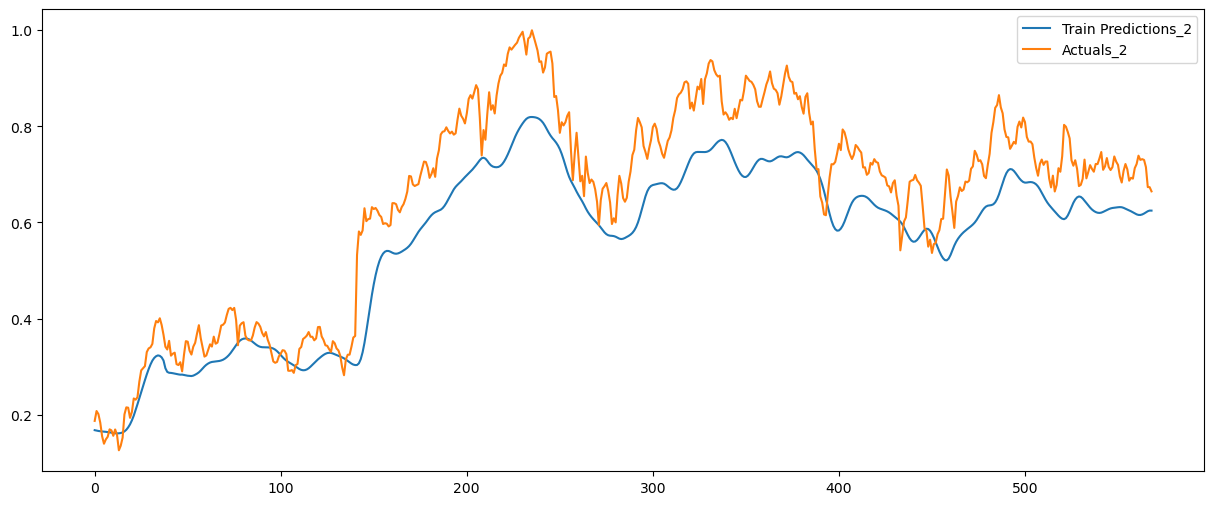

In [85]:
train_results_2.plot(figsize=(15,6))

In [94]:
train_predictions = model4.predict(x_train)
train_results_3 = pd.DataFrame(data={'Train Predictions_3':train_predictions[:,3], 'Actuals_3':y_train[:,3]})
train_results_3

18/18 [==============================] - 1s 37ms/step


,Train Predictions_3,Actuals_3
0,0.240000,0.190064
1,0.237413,0.212971
2,0.234761,0.199749
3,0.232214,0.178233
4,0.229803,0.154997
...,...,...
564,0.729658,0.724052
565,0.732431,0.710277
566,0.735244,0.670702
567,0.736931,0.666771


<Axes: >

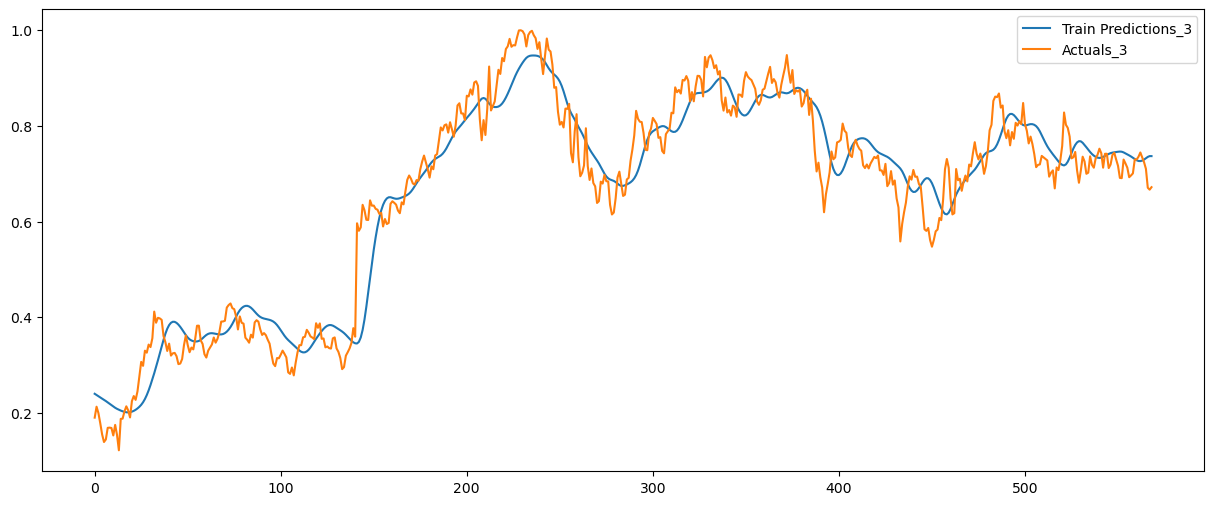

In [95]:
train_results_3.plot(figsize=(15,6))

**Checking prediction with validation data**

In [99]:
val_predictions = model4.predict(x_val)
val_results = pd.DataFrame(data={'val Predictions':val_predictions[:,0], 'Actuals':y_val[:,0]})
val_results

6/6 [==============================] - 0s 21ms/step


,val Predictions,Actuals
0,0.424475,0.342793
1,0.425235,0.293510
2,0.423103,0.316151
3,0.418401,0.335358
4,0.411836,0.330943
...,...,...
187,0.732871,0.587434
188,0.721471,0.571698
189,0.708462,0.601773
190,0.694408,0.616981


<function matplotlib.pyplot.show(close=None, block=None)>

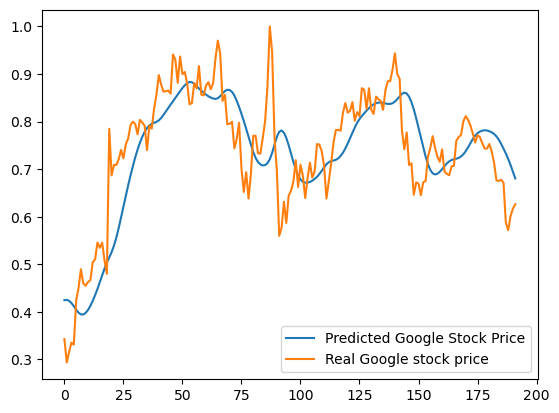

In [100]:
plt.plot(val_results['val Predictions'],label='Predicted Google Stock Price')
plt.plot(val_results['Actuals'],label='Real Google stock price')
plt.legend()
plt.show


In [101]:
test_predictions = model4.predict(x_test)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[:,0], 'Actuals':y_test[:,0]})
test_results

10/10 [==============================] - 0s 22ms/step


,Test Predictions,Actuals
0,0.214977,0.222003
1,0.216795,0.228103
2,0.218978,0.237423
3,0.221332,0.224158
4,0.223655,0.218758
...,...,...
313,0.892379,0.963424
314,0.902232,0.955532
315,0.909902,0.953767
316,0.914943,0.938736


<function matplotlib.pyplot.show(close=None, block=None)>

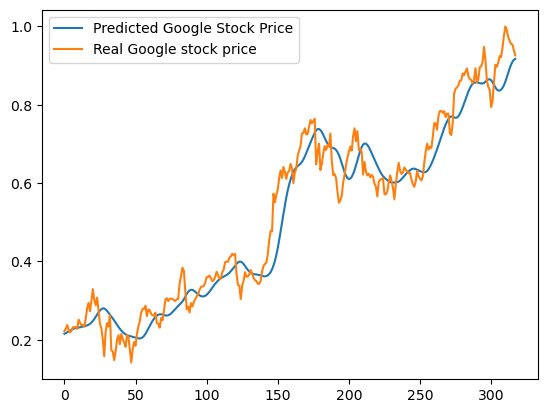

In [102]:
plt.plot(test_results['Test Predictions'],label='Predicted Google Stock Price')
plt.plot(test_results['Actuals'],label='Real Google stock price')
plt.legend()
plt.show


**Checking prediction with testing unknown data**

In [53]:
data=pd.read_csv("/kaggle/input/googledta/testset.csv",parse_dates=True,index_col=['Date'])

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [54]:
# data_train=pd.DataFrame(df['Close'])
data_train=pd.DataFrame(df[['Open','High','Low','Close']])

In [55]:
print(data_train.shape)

(1259, 4)


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_array=scaler.fit_transform(data_train)

In [57]:
x_test1=[]
y_test1=[]

for i in range(length,data_train_array.shape[0]):
    x_test1.append(data_train_array[i-length:i])
    y_test1.append(data_train_array[i])
    
x_test1,y_test1=np.array(x_test1),np.array(y_test1)

In [58]:
x_test1.shape,y_test1.shape

((1199, 60, 4), (1199, 4))

In [59]:
test_predictions = model1.predict(x_test1)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[:,0], 'Actuals':y_test1[:,0]})
test_results



38/38 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,0.089591,0.061895
1,0.088070,0.068424
2,0.089020,0.074535
3,0.089479,0.068225
4,0.088172,0.055764
...,...,...
1194,0.974657,0.980569
1195,0.969223,0.976377
1196,0.962489,0.975440
1197,0.956239,0.967455


<function matplotlib.pyplot.show(close=None, block=None)>

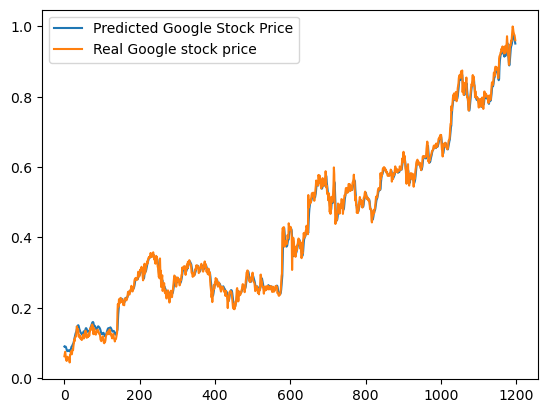

In [60]:
plt.plot(test_results['Test Predictions'],label='Predicted Google Stock Price')
plt.plot(test_results['Actuals'],label='Real Google stock price')
plt.legend()
plt.show


In [62]:
test_predictions = model1.predict(x_test1)
test_results = pd.DataFrame(data={'Test Predictions_0':test_predictions[:,0],'Test Predictions_1':test_predictions[:,1],'Test Predictions_2':test_predictions[:,2],'Test Predictions_3':test_predictions[:,3], 'Actuals_0':y_test1[:,0]})
test_results

38/38 [==============================] - 0s 3ms/step


,Test Predictions_0,Test Predictions_1,Test Predictions_2,Test Predictions_3,Actuals_0
0,0.089591,0.104486,0.130334,0.093636,0.061895
1,0.088070,0.102775,0.129152,0.091997,0.068424
2,0.089020,0.103008,0.128647,0.092765,0.074535
3,0.089479,0.103284,0.128498,0.093309,0.068225
4,0.088172,0.102350,0.128087,0.092136,0.055764
...,...,...,...,...,...
1194,0.974657,0.996915,0.964178,0.977387,0.980569
1195,0.969223,0.993311,0.964787,0.972411,0.976377
1196,0.962489,0.987812,0.963359,0.966267,0.975440
1197,0.956239,0.982795,0.960141,0.960312,0.967455


<Axes: >

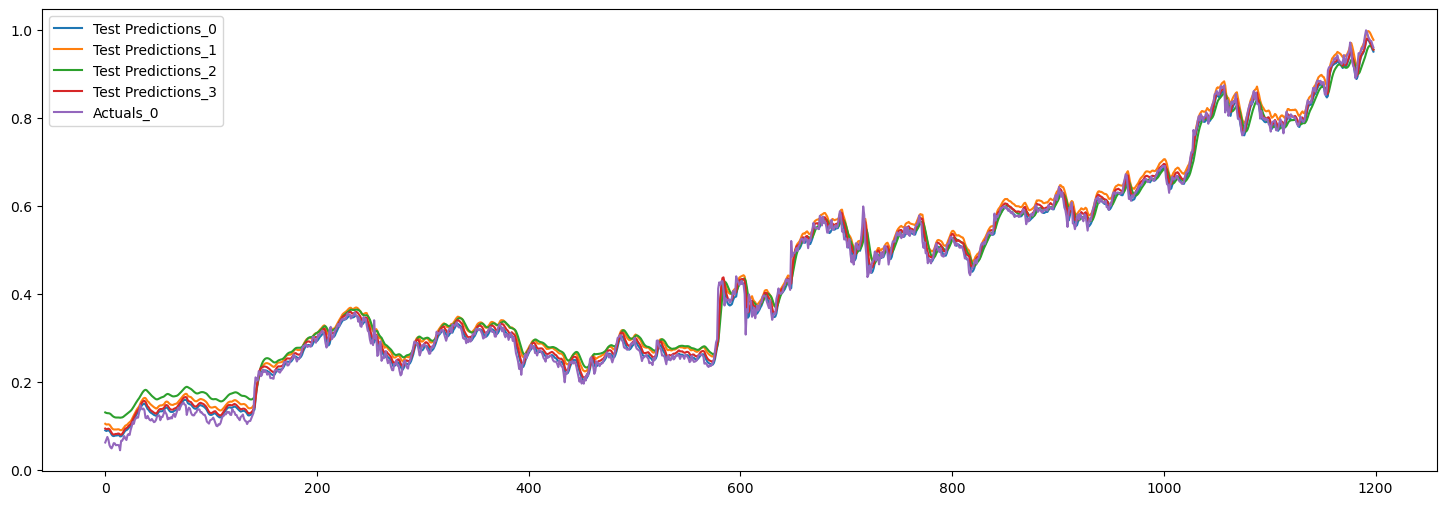

In [66]:
test_results.plot(figsize=(18,6))

In [103]:
test_predictions = model4.predict(x_test1)
test_results = pd.DataFrame(data={'Test Predictions_1':test_predictions[:,1], 'Actuals_1':y_test1[:,1]})
test_results

38/38 [==============================] - 1s 22ms/step


,Test Predictions_1,Actuals_1
0,0.184548,0.066120
1,0.184412,0.074703
2,0.184267,0.074273
3,0.184124,0.068508
4,0.183985,0.055708
...,...,...
1194,0.927934,0.980373
1195,0.933199,0.974770
1196,0.937217,0.972366
1197,0.939762,0.967395


<Axes: >

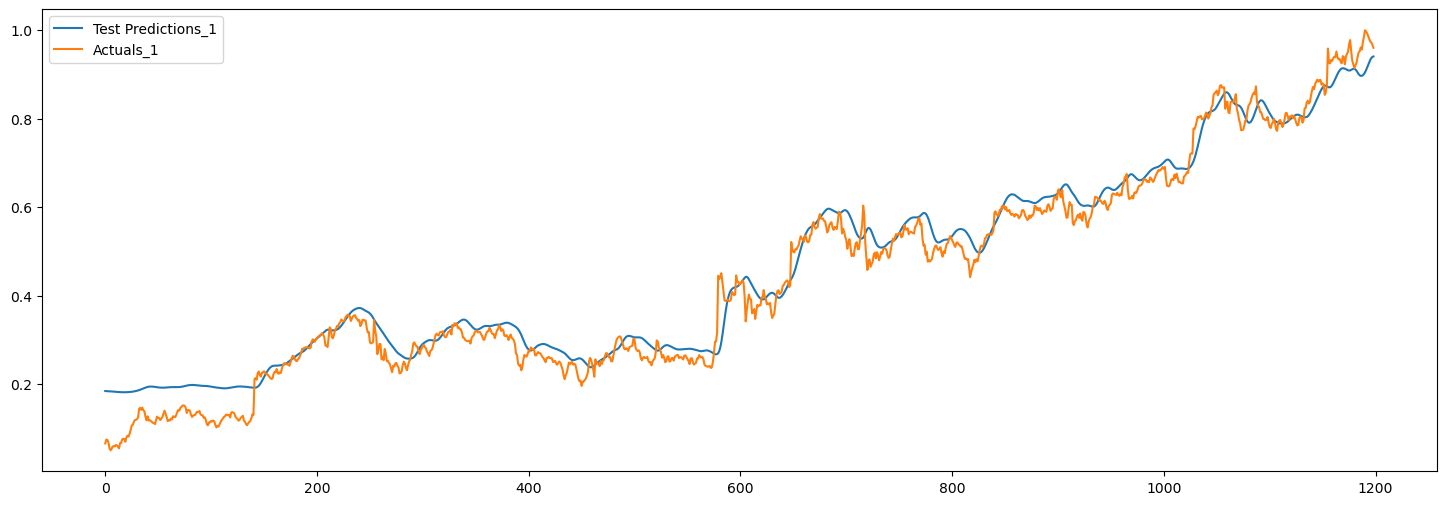

In [104]:
test_results.plot(figsize=(18,6))

# Rough 

Epoch 1/10
40/40 [==============================] - 4s 6ms/step - loss: 0.0551
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 6.7762e-04
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 6.7069e-04
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 6.6882e-04
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 6.2422e-04
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 6.1850e-04
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 6.2091e-04
Epoch 9/10
40/40 [==============================] - 0s 6ms/step - loss: 6.0815e-04
Epoch 10/10
1/1 [==============================] - 1s 691ms/step


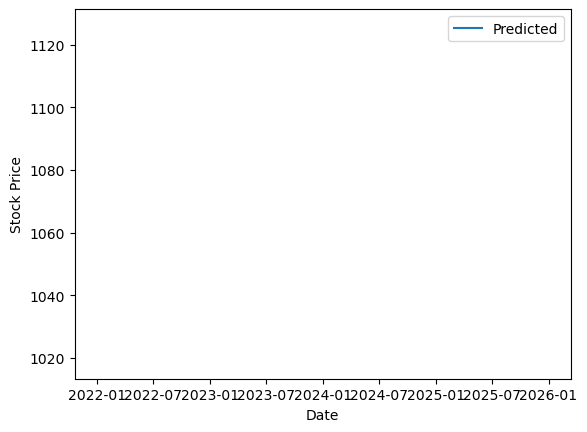

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
# Step 1: Data Collection
# Assume you have a CSV file 'stock_data.csv' containing the historical stock data

# Load the data
df = pd.read_csv('/kaggle/input/googledta/trainset.csv')

# Step 2: Data Preprocessing
# Extract the 'Close' prices and normalize the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Data Partitioning
# Split the data into training and test sets
train_data = scaled_data

# Step 4: Sequence Generation
# Create input sequences and corresponding output values
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Define the number of historical data points to consider
X_train, y_train = create_sequences(train_data, sequence_length)

# Step 6: Model Architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Model Training
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 9: Prediction for 2024
# Generate predictions for 2024
start_index = len(scaled_data) - sequence_length
end_index = start_index + 252  # Assuming 252 trading days in 2024
input_sequence = scaled_data[start_index:end_index].reshape(1, -1, 1)
predictions = model.predict(input_sequence)

# Step 10: Post-processing
# Inverse the scaling of the predicted values
predictions = scaler.inverse_transform(predictions)

# Step 11: Visualization and Analysis
# Plot the predicted stock prices for 2024
# dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='B')  # Assuming business days
# plt.plot(dates_2024, predictions.flatten(), label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()
dates_2024 = pd.date_range(start='2024-01-01', periods=len(predictions), freq='B')  # Assuming business days
plt.plot(dates_2024, predictions.flatten(), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Data Collection
# Assume you have a CSV file 'stock_data.csv' containing the historical stock data

# Load the data
df = pd.read_csv('/kaggle/input/googledta/trainset.csv')

# Step 2: Data Preprocessing
# Extract the 'Close' prices and normalize the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Data Partitioning
# Split the data into training and test sets
train_data = scaled_data

# Step 4: Sequence Generation
# Create input sequences and corresponding output values
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Define the number of historical data points to consider
X_train, y_train = create_sequences(train_data, sequence_length)
X_train.shape

# Step 6: Model Architecture
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Step 7: Model Training
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# # Step 9: Prediction for 2024
# # Generate predictions for 2024
# start_index = len(scaled_data) - sequence_length
# end_index = start_index + 252  # Assuming 252 trading days in 2024
# input_sequence = scaled_data[start_index:end_index].reshape(1, -1, 1)
# predictions = model.predict(input_sequence)

# # Step 10: Post-processing
# # Inverse the scaling of the predicted values
# predictions = scaler.inverse_transform(predictions)

# # Step 11: Visualization and Analysis
# # Plot the predicted stock prices for 2024
# dates_2024 = pd.date_range(start=df['Date'].iloc[start_index], periods=252, freq='B')  # Assuming business days
# plt.plot(dates_2024, predictions.flatten(), label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()


(1249, 10, 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Data Preparation
# Load the historical stock price data
df = pd.read_csv("/kaggle/input/googledta/trainset.csv")  # Replace with your dataset

# Filter the data for the desired time range (2013 to 2017)
start_date = '2013-01-01'
end_date = '2017-12-31'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Preprocess the data
# Perform any necessary data cleaning and feature selection

# Step 2: Feature Engineering
# Create input sequences and target variables
sequence_length = 60  # Length of the input sequence
num_features = 1  # Number of features (e.g., close price)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

x_train = []
y_train = []
for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i - sequence_length:i])
    y_train.append(scaled_data[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

# Step 3: Model Architecture
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, num_features)))
model.add(Dense(1))

# Step 4: Model Training
model.compile(loss='mean_squared_error', optimizer='adam')
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

# Step 5: Model Evaluation
# Evaluate the model on the training and validation datasets

# Step 6: Prediction
# Load the best model from the checkpoint
best_model = load_model('best_model.h5')

# Prepare the input data for prediction
# Get the last sequence_length data points from the historical data (2013 to 2017)
last_sequence = scaled_data[-sequence_length:]
x_test = np.array([last_sequence])

# Make predictions using the trained model
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Step 7: Visualization and Analysis
# Plot the predicted stock prices for 2018
dates_2018 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='B')  # Assuming business days
plt.plot(dates_2018, predictions.flatten(), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for 2018')
plt.legend()
plt.show()
